# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix
from scipy.stats import mode

# Load Dataset

In [2]:
import gdown

# Replace with your Google Drive shareable link
url = 'https://drive.google.com/file/d/13CJLrStKcEBjCZRAUbcYvMaiTfGeH1ug/view?usp=sharing'

# Convert to the direct download link
file_id = url.split('/d/')[1].split('/')[0]
direct_url = f'https://drive.google.com/uc?id={file_id}'

# Download
gdown.download(direct_url, 'seeds.txt', quiet=False)
!ls

Downloading...
From: https://drive.google.com/uc?id=13CJLrStKcEBjCZRAUbcYvMaiTfGeH1ug
To: /content/seeds.txt
100%|██████████| 9.30k/9.30k [00:00<00:00, 18.5MB/s]

sample_data  seeds.txt


In [3]:
columns = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "groove", "class"]
df = pd.read_csv("./seeds.txt", names=columns, sep="\s+") # \s+ => any spaces

df.head(2)

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1


In [4]:
X = df.drop(["class"], axis=1)

# Visualization

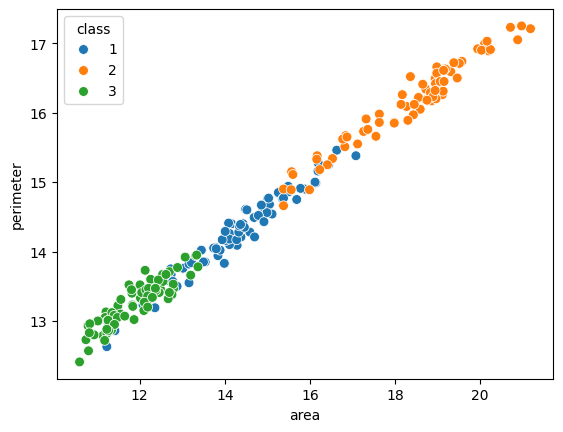

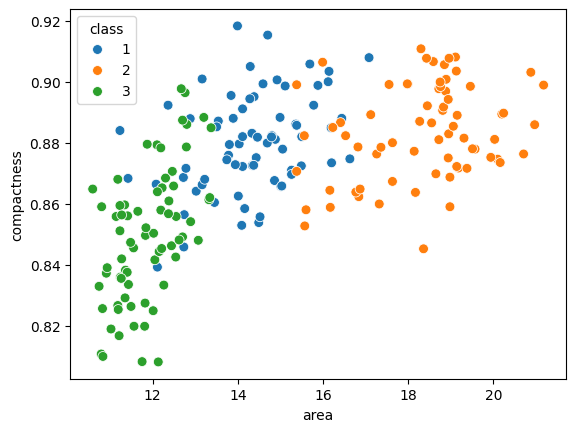

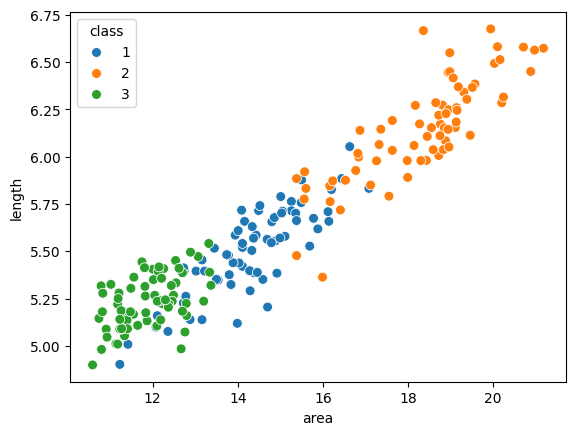

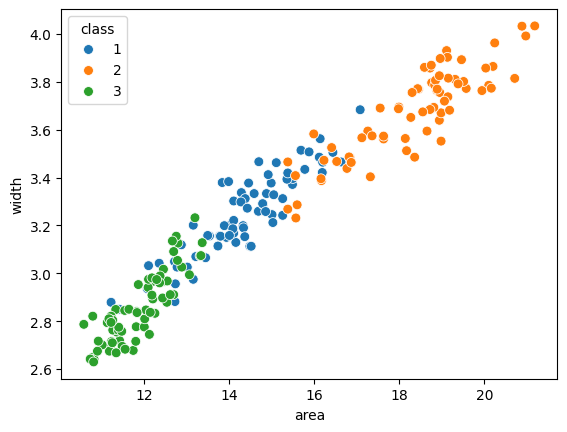

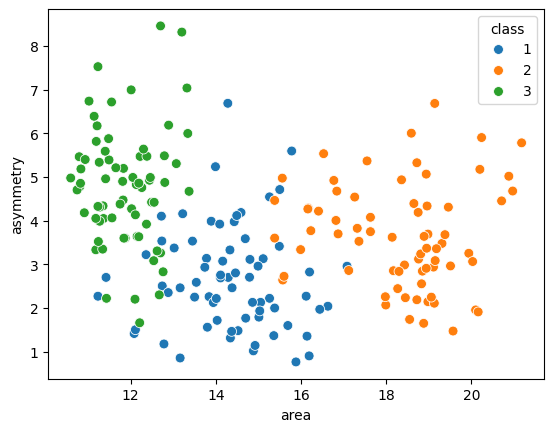

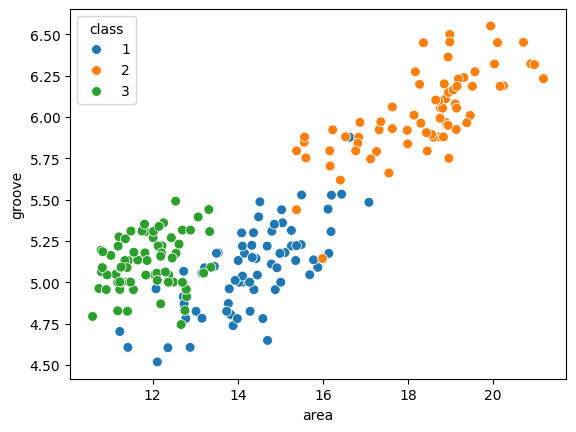

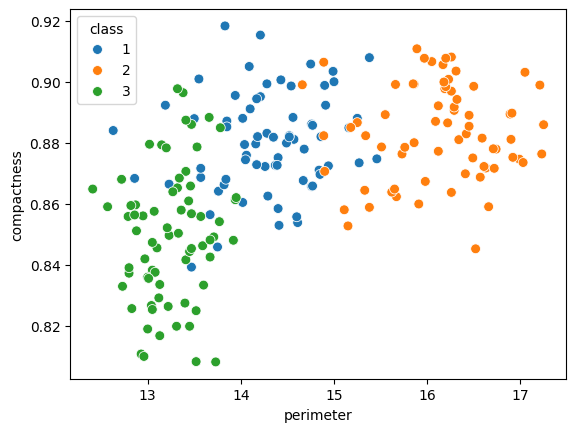

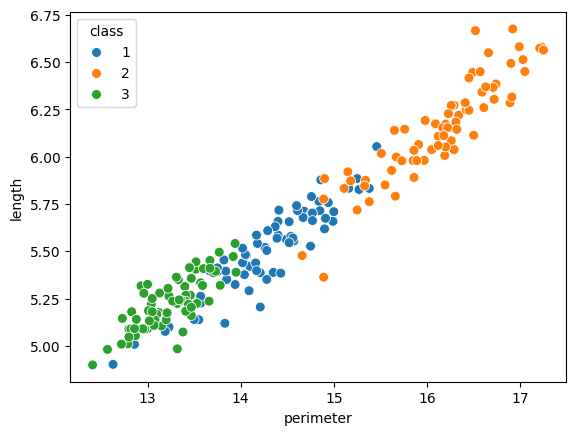

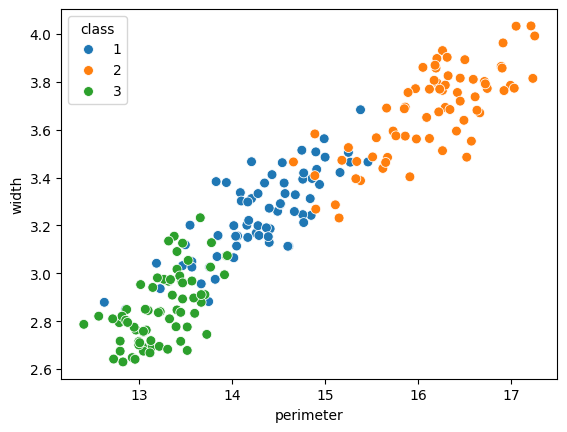

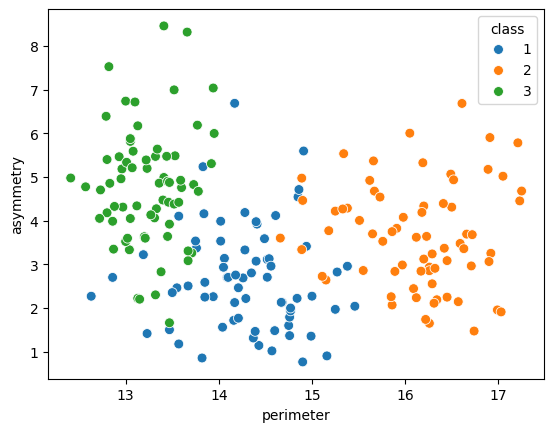

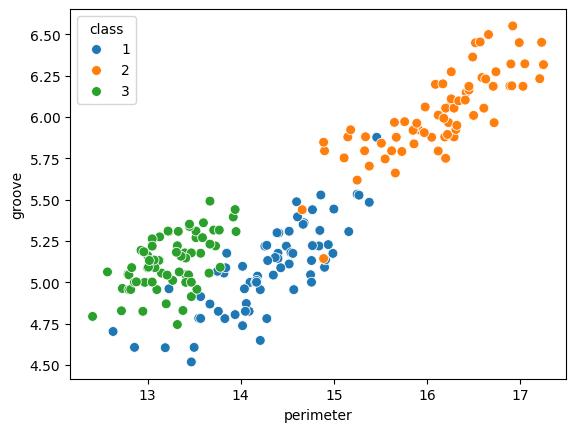

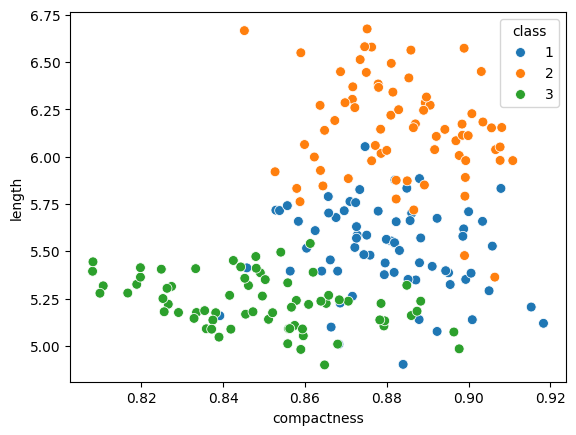

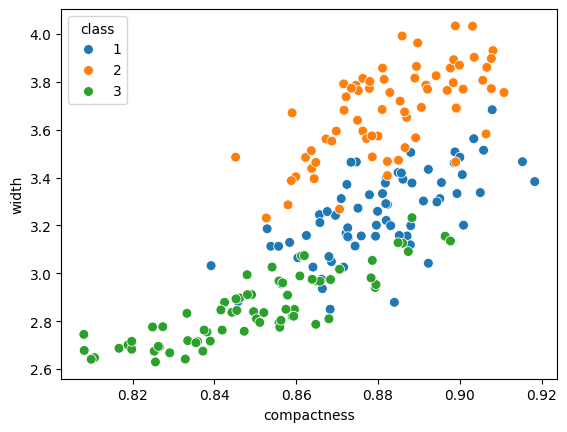

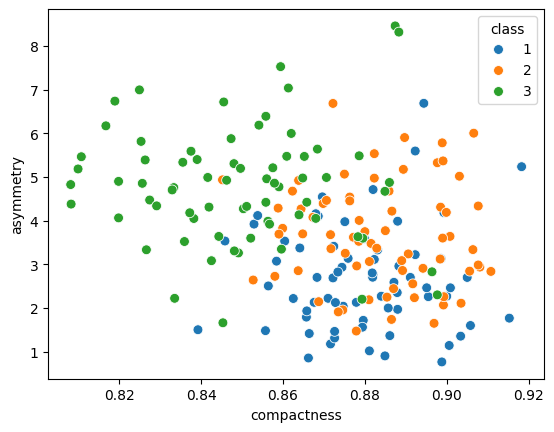

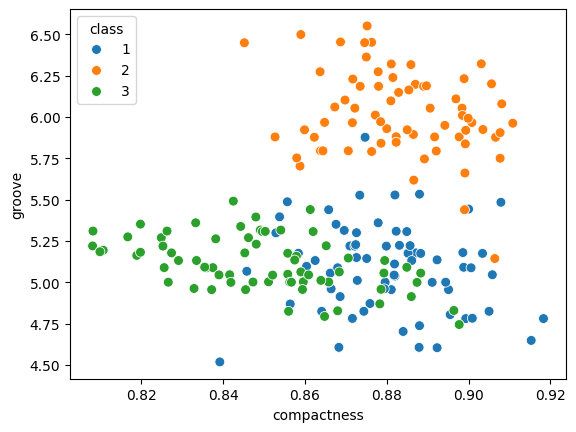

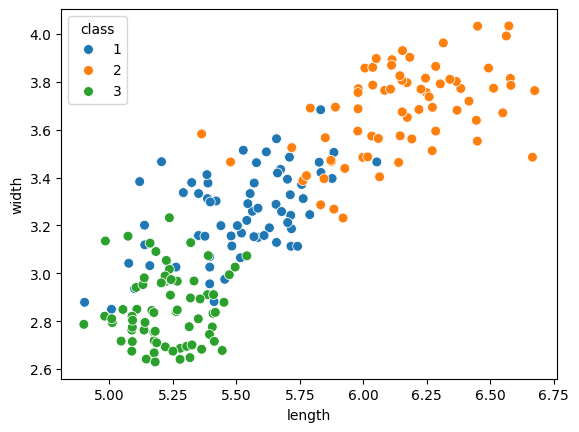

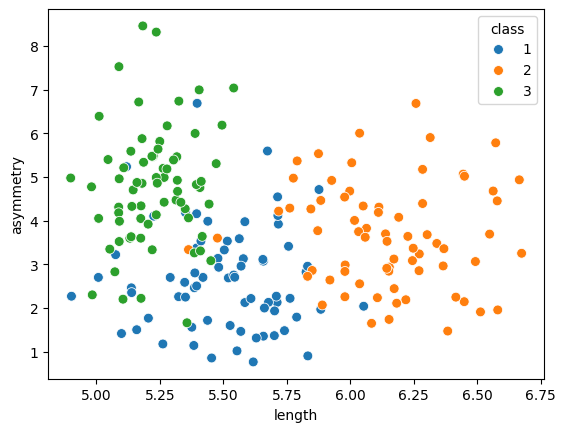

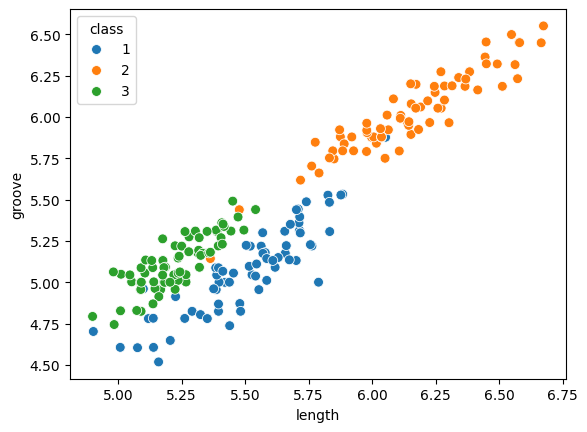

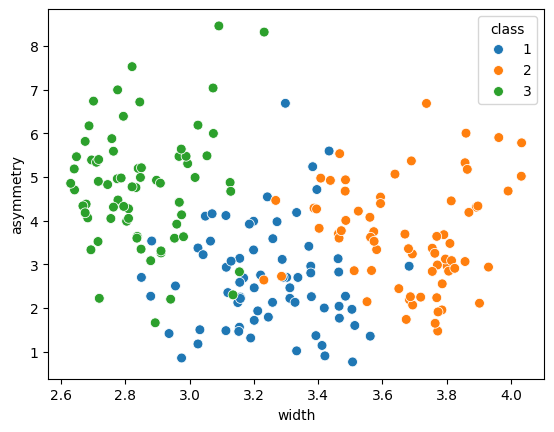

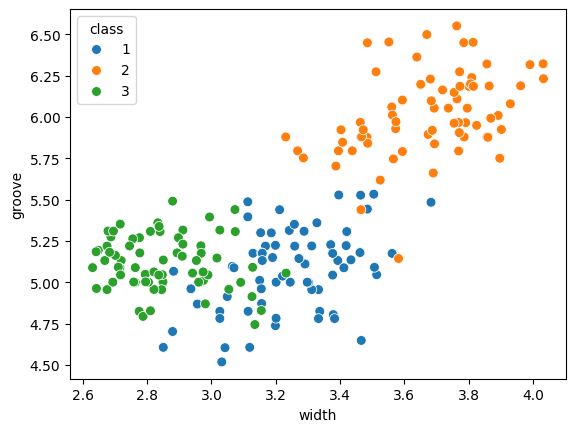

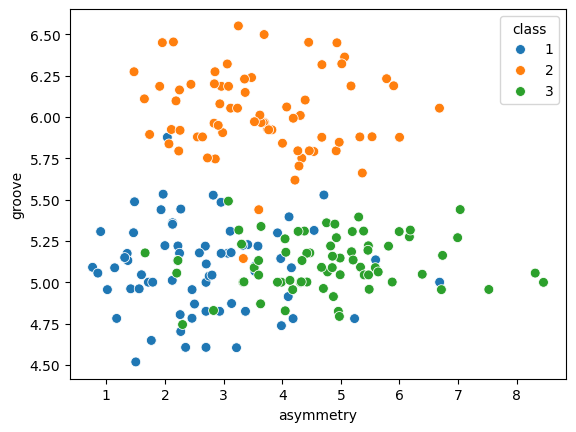

In [ ]:
for i in range(len(columns) - 1):
  for j in range(i+1, len(columns) - 1):
    sns.scatterplot(x=columns[i], y=columns[j], data=df, hue="class", palette="tab10", s=50)
    plt.show()

# Normalization

With distance-based models we should use MinMaxScalar

In [6]:
scaler = preprocessing.MinMaxScaler()

X_norm = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_norm.head(2)

,area,perimeter,compactness,length,width,asymmetry,groove
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.189302,0.345150
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165


# Clustering

In [7]:
k_means = KMeans(n_clusters=3)
k_means.fit(X_norm)

KMeans(n_clusters=3)

In [8]:
y_pred = k_means.labels_
y_true = df["class"] - 1

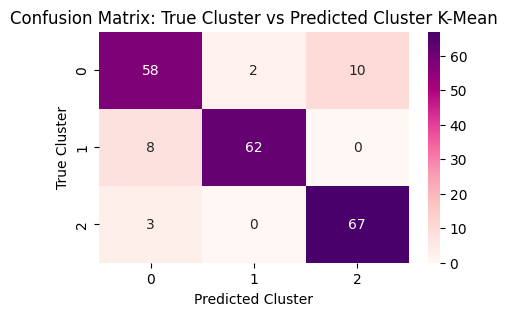

In [9]:
# map each cluster index to the correct label.
y_pred_remap = np.zeros_like(y_pred)
for cluster in np.unique(y_pred):
    mask = y_pred == cluster
    y_pred_remap[mask] = mode(y_true[mask], keepdims=True).mode[0]


# Build confusion matrix
cm = confusion_matrix(y_true, y_pred_remap)

# Plot
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu')
plt.xlabel('Predicted Cluster')
plt.ylabel('True Cluster')
plt.title('Confusion Matrix: True Cluster vs Predicted Cluster K-Mean')
plt.show()